<a href="https://colab.research.google.com/github/neto-riga/metodos_numericos_2/blob/main/7_interpolaci%C3%B3n_por_diferencias_de_newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)

#Ejercicio 7. Interpolación por diferencias de Newton.
-----
Martínez Venegas Raúl \\
Rivera Gálvez Ernesto 

La siguiente tabla de valores proporciona las presiones de vapor a diferentes temperaturas para el 1-3 butadieno.

|$i$|$X_{i}$|$f(x_{i})$|
|---|---------|------|
|0|50|24.94|
|1|60|30.11|
|2|70|36.05|
|3|80|42.84|
|4|90|50.57|
|5|100|59.30|

* Obtener una estimación para la presión a 57°. 
* Estimas la presión a 96°.
* Ambos con polinomios de $2^{do}$ y $3^{er}$ grado.
* Graficar y elaborar tus conclusiones.

In [ ]:
import numpy as np 
import pandas as pd 
import sympy as sp
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Implementamos el algoritmo para realizar las diferencias.

In [ ]:
def Newton(x, y, lugar, n, soluciones):
  if lugar == (n):
    return 
  soluciones_lugar = []
  for i in range(n-(lugar)):
    soluciones_lugar.append((y[i+1] - y[i]))
  for _ in range(lugar-1):
    soluciones_lugar.append(0)
  soluciones.append(soluciones_lugar)
  Newton(x, soluciones_lugar, lugar+1, n, soluciones)
  return np.array(soluciones)

In [ ]:
X = [50,60,70,80,90,100]
fx = [24.94,30.11,36.05,42.84,50.57,59.30]
sol = []
sol = Newton(X, fx, 1, 6, sol)
pd.DataFrame(sol.T)

,0,1,2,3,4
0,5.17,0.77,0.08,0.01,-0.04
1,5.94,0.85,0.09,-0.03,0.00
2,6.79,0.94,0.06,0.00,0.00
3,7.73,1.00,0.00,0.00,0.00
4,8.73,0.00,0.00,0.00,0.00


Aplicamos el algotirmo para obtener los polinonios.

In [ ]:
def poli(arr, X, Y, aprox, pos_y,grado):
  res = 0
  mult = 1
  s = (aprox - X[pos_y])/(X[1]-X[0])
  for i in range(grado):
    mult *= (s-i)
    res += (arr[i]/math.factorial(i+1)) * mult
  res += Y[pos_y]
  return res

Estimamos para 57° con el polinomios de segundo grado, siendo $F2$:

In [ ]:
x = sp.Symbol('x')
F2 = lambda x: poli(sol[:,0],X,fx,x,0,2)
sp.simplify(poli(sol[:,0],X,fx,x,0,2).evalf(5))

0.00385*x**2 + 0.0935*x + 10.64

Con un valor de:

In [ ]:
F2(57)

28.47815

Para el polinomio de tercer grado $F3$ tenemos:

In [ ]:
F3 = lambda x: poli(sol[:,0],X,fx,x,0,3)
sp.simplify(poli(sol[:,0],X,fx,x,0,3).evalf(5))

1.3333e-5*x**3 + 0.00145*x**2 + 0.23617*x + 7.84

Con una estimación de:

In [ ]:
F3(57)

28.48179

Para estimar 96° hacemos uso del método de Newton con diferencias regresivas.

In [ ]:
def poliREG(arr, X, Y, aprox, pos_y,grado):
  res = 0
  mult = 1
  s = (aprox - X[pos_y])/(X[1]-X[0])
  for i in range(grado):
    mult *= (s+i)
    res += (arr[i,-(i+1)]/math.factorial(i+1)) * mult
  res += Y[pos_y]
  return res

Estimamos el polinomio de segundo grado siendo $F22$:

In [ ]:
F22 = lambda x: poliREG(sol,X,fx,x,5,2)
sp.simplify(poliREG(sol,X,fx,x,5,2).evalf(5))

0.005*x**2 - 0.077001*x + 17.0

En 96°:

In [ ]:
F22(96)

55.687999999999995

Estimamos el polinomio de tercer grado siendo $F33$

In [ ]:
F33 = lambda x: poliREG(sol,X,fx,x,5,3)
sp.simplify(poliREG(sol,X,fx,x,5,3).evalf(5))

1.0e-5*x**3 + 0.0023*x**2 + 0.165*x + 9.8

En 96° tenemos:

In [ ]:
F33(96)

55.68416

Graficando obtenemos

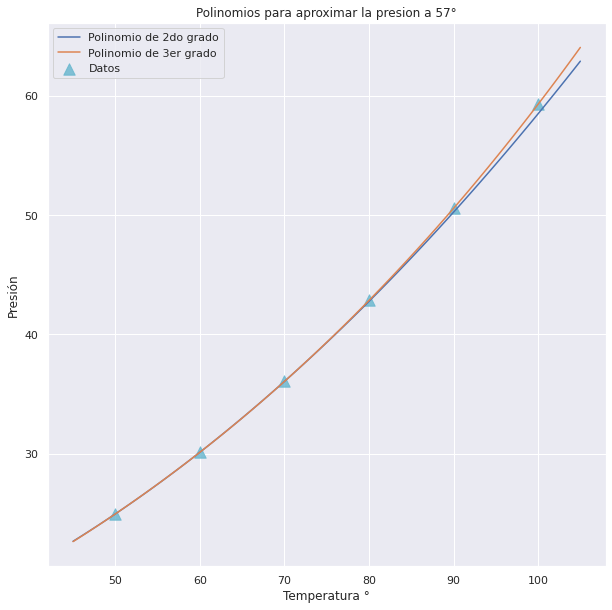

In [ ]:
x_ = np.linspace(45, 105, 100)
plt.figure(figsize=(10,10))
plt.scatter(X, fx, marker="^", s=130, c='c', alpha=0.8)
plt.plot(x_, F2(x_), x_, F3(x_))
plt.title("Polinomios para aproximar la presion a 57°")
plt.legend(["Polinomio de 2do grado", "Polinomio de 3er grado", "Datos"])
plt.xlabel("Temperatura °")
plt.ylabel("Presión")

plt.show()

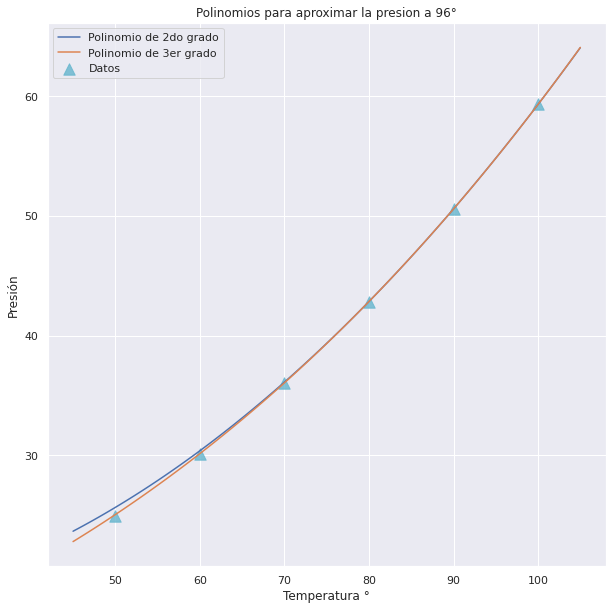

In [ ]:
x_ = np.linspace(45, 105, 100)
plt.figure(figsize=(10,10))
plt.scatter(X, fx, marker="^", s=130, c='c', alpha=0.8)
plt.plot(x_, F22(x_), x_, F33(x_))
plt.title("Polinomios para aproximar la presion a 96°")
plt.legend(["Polinomio de 2do grado", "Polinomio de 3er grado", "Datos"])
plt.xlabel("Temperatura °")
plt.ylabel("Presión")

plt.show()

## Conlcusiones
Notemos que el polinomio que se obtuvo mediante el método de Newton progresivo tiene valores muy similares para las temperaturas bajas, es decir, para los valores cercanos al que se requiere aproximar; pero conforme aumenta la temperatura, las funciones empiezan a distanciarse entre ellas.

De manera similar, cuando se utiliza el método de Newton regresivo se obtienen valores muy cercanos alrededor del punto a aproximar, sin embargo podemos ver la diferencia de los polinomios para las temperaturas más bajas.



## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)